In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

data_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/Summer 2021/data/'
results_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/Summer 2021/results/'

In [2]:
df = pd.read_csv(data_dir + 'redcap/WearableAssessment_DATA_2022-01-12_1302.csv')

tofill = df.loc[~df['redcap_event_name'].str.startswith('day', na=False)].index.to_list()
fillCols = df.loc[tofill].isna().all()[df.loc[tofill].isna().all() == False].index

df[fillCols] = df[fillCols].fillna(method='ffill')
df['record_id'] = df['record_id'].astype(str)
df = df[~df['record_id'].str.contains('TEST', na = False)] 

df.head(20)

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,19,22,43,45,46,60,78,80,127,132,134,140,141,142,144,150,151,152,160,161,162,164,171,174,178,179,180,181,184,193,195,198,199,200,201,204,205,206,207,208,209,210,212,214,224,226,227,296,297,298,299,302,303,304,305,306,308,322,328,329,333,334,341,347,417,420,422,423,430,454,456,457,459,460,461,463,465,467,487) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,record_id,redcap_event_name,contact_information_timestamp,survey_consent,contact_date,smartphone_own,are_you_currently_in_the_a,contact_information_complete,screening_questionnaire_timestamp,age_group,...,caffeinated_drinks_v2_sense,sleeping_pill_v2_sense,sleeping_pill_name_v2_sense,additional_meds_v2_sense,additional_med_name1_v2_sense,sad_v2_sense,happy_v2_sense,stress_a11e49_v2_sense,activity_v2_sense,sense_daily_sleep_survey_complete
0,11,online_eligibility_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,session_1_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,day_1_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,11,day_2_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,11,day_3_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,11,day_4_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,11,day_5_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,11,day_6_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,11,day_7_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,11,day_8_arm_1,2019-10-10 14:14:07,[document],2019-10-10,1.0,NaN,2.0,2019-10-10 14:19:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
[col for col in df.columns if 'date' in col]

['contact_date',
 'seizure_date',
 'date',
 'icf_date',
 'icf_date_v2',
 'icf_date_v2_sense',
 'eqip_date',
 'session1_date',
 'sleep_diary_date',
 'sleep_diary_date_v2',
 'session1_date_v2',
 'session1_date_sense',
 'session2_date_sense',
 'sleep_diary_date_v2_sense']

In [4]:
print('Number of Sense participants: %d' % df[~df['session1_date_sense'].isna()]['record_id'].unique().shape[0])

Number of Sense participants: 143


In [5]:
subjects = df[~df['session1_date_sense'].isna()]['record_id'].unique()
subjects

array(['186', '187', '188', '189', '190', '191', '192', '193', '194',
       '195', '196', '197', '198', '199', '200', '201', '202', '203',
       '204', '205', '206', '207', '208', '209', '210', '211', '212',
       '213', '214', '215', '216', '217', '218', '219', '220', '221',
       '222', '223', '224', '225', '226', '228', '229', '231', '233',
       '234', '235', '236', '237', '238', '239', '240', '241', '242',
       '243', '244', '245', '246', '247', '248', '249', '250', '251',
       '252', '253', '254', '255', '256', '257', '258', '259', '260',
       '261', '262', '263', '264', '265', '266', '267', '268', '269',
       '270', '271', '272', '273', '274', '275', '276', '277', '278',
       '279', '280', '281', '282', '283', '284', '285', '286', '287',
       '288', '289', '290', '291', '292', '293', '294', '295', '296',
       '297', '298', '299', '300', '301', '302', '303', '304', '305',
       '306', '307', '308', '309', '310', '311', '312', '313', '314',
       '315', '316',

In [6]:
df = df[df['record_id'].isin(subjects)]
df

,record_id,redcap_event_name,contact_information_timestamp,survey_consent,contact_date,smartphone_own,are_you_currently_in_the_a,contact_information_complete,screening_questionnaire_timestamp,age_group,...,caffeinated_drinks_v2_sense,sleeping_pill_v2_sense,sleeping_pill_name_v2_sense,additional_meds_v2_sense,additional_med_name1_v2_sense,sad_v2_sense,happy_v2_sense,stress_a11e49_v2_sense,activity_v2_sense,sense_daily_sleep_survey_complete
781,186,online_eligibility_arm_1,2021-05-25 17:32:12,[document],2021-05-25,1.0,1.0,2.0,2021-05-25 17:37:30,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,186,session_1_arm_1,2021-05-25 17:32:12,[document],2021-05-25,1.0,1.0,2.0,2021-05-25 17:37:30,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
783,186,day_1_arm_1,2021-05-25 17:32:12,[document],2021-05-25,1.0,1.0,2.0,2021-05-25 17:37:30,1.0,...,3.0,0.0,NaN,0.0,NaN,0.0,79.0,31.0,1.0,2.0
784,186,day_2_arm_1,2021-05-25 17:32:12,[document],2021-05-25,1.0,1.0,2.0,2021-05-25 17:37:30,1.0,...,2.0,0.0,NaN,0.0,NaN,0.0,72.0,50.0,0.0,2.0
785,186,day_3_arm_1,2021-05-25 17:32:12,[document],2021-05-25,1.0,1.0,2.0,2021-05-25 17:37:30,1.0,...,4.0,0.0,NaN,0.0,NaN,32.0,41.0,73.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,327,online_eligibility_arm_1,2021-11-09 17:32:54,[document],2021-11-09,1.0,1.0,2.0,2021-11-09 17:14:11,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2601,328,online_eligibility_arm_1,2021-11-09 19:29:33,[document],2021-11-09,1.0,1.0,2.0,2021-11-09 19:39:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2602,329,online_eligibility_arm_1,2021-11-10 15:47:23,[document],2021-11-10,1.0,1.0,2.0,2021-11-09 19:39:06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2603,330,online_eligibility_arm_1,2021-11-11 11:02:28,[document],2021-11-11,1.0,1.0,2.0,2021-11-11 11:05:20,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
[col for col in df.columns if 'caff' in col]

['caffeine',
 'caffeinated_drinks',
 'caffeinated_drinks_v2',
 'caffeinated_drinks_v2_sense']

In [8]:
[col for col in df.columns if 'gender' in col]

['gender', 'gender_other']

In [9]:
df = df[~df['sleep_diary_date_v2_sense'].isna()].dropna(axis=1, how='all')

In [10]:
df.to_csv(data_dir + 'redcap/sleepDiary.csv', index=None)

In [11]:
sleepVars = [col for col in df.columns if 'sleep' in col or 'bed' in col or 'wake' in col or 'activity' in col]
moodVars = [col for col in df.columns if 'happy' in col or 'sad' in col or 'stress' in col]
completeVars = [col for col in df.columns if 'complete' in col]


In [12]:
df0 = df.copy()
df = df0[['record_id', 'gender', 'caffeinated_drinks_v2_sense', 'alcohol_59a121_v2_sense'] + sleepVars + moodVars]

df['bed_time_0fbbb9_v2_sense'] = pd.to_datetime(df['bed_time_0fbbb9_v2_sense'])
df['sleep_time_v2_sense'] = pd.to_datetime(df['sleep_time_v2_sense'])
df['wakeup_time_v2_sense'] = pd.to_datetime(df['wakeup_time_v2_sense'])

df['tib'] = (df['wakeup_time_v2_sense'] - df['bed_time_0fbbb9_v2_sense']).dt.total_seconds() / 60
df['tst'] = (df['wakeup_time_v2_sense'] - df['sleep_time_v2_sense']).dt.total_seconds() / 60

sleepVars = sleepVars + ['tib', 'tst']

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [13]:
dfgr = df[['record_id', 'gender', 'alcohol_59a121_v2_sense', 'caffeinated_drinks_v2_sense'] + sleepVars + moodVars].groupby(['record_id']).mean()#.select_dtypes(include=np.number)

In [14]:
sleepVars = [col for col in dfgr.columns if 'sleep' in col or 'bed' in col or 'wake' in col or 'activity' in col] + ['tst', 'tib']
sleepVars = [var for var in sleepVars if var not in completeVars and 'time' not in var and 'awakening' not in var and 'date' not in var and 'comments' not in var and not var.endswith('v2')]
sleepVars

['sleep_med',
 'sleep_hours',
 'sleep_disorder',
 'if_yes_is_your_sleep_disor',
 'fall_asleep',
 'hours_bed',
 'tr_sleep_30',
 'tr_wakeup',
 'sleep_medication',
 'trouble_staying_awake',
 'sleep_enthusiasm',
 'sleep_quality',
 'fall_asleep_raw',
 'sleep_latency_raw',
 'sleep_efficiency',
 'sleep_disruption_raw',
 'sleep_dysfunction_raw',
 'sleep_minutes_v2_sense',
 'wakeups_v2_sense',
 'sleep_quality_f4be7b_v2_sense',
 'sleeping_pill_v2_sense',
 'sleeping_pill_name_v2_sense',
 'activity_v2_sense',
 'tst',
 'tib']

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

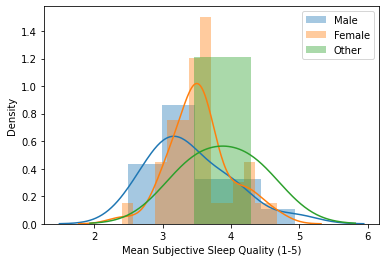

In [15]:
sns.distplot(dfgr['sleep_quality_f4be7b_v2_sense'][dfgr['gender'] == 1], label= 'Male')
sns.distplot(dfgr['sleep_quality_f4be7b_v2_sense'][dfgr['gender'] == 2], label='Female')
sns.distplot(dfgr['sleep_quality_f4be7b_v2_sense'][dfgr['gender'] == 3], label='Other')
plt.xlabel('Mean Subjective Sleep Quality (1-5)')

plt.legend()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mean Number Caffeinated Drinks')

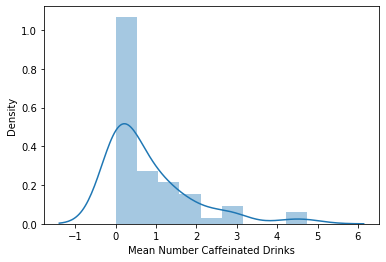

In [16]:
sns.distplot(dfgr['caffeinated_drinks_v2_sense'])
plt.xlabel('Mean Number Caffeinated Drinks')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mean Number Alcoholic Drinks')

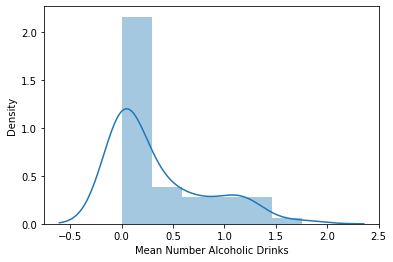

In [17]:
sns.distplot(dfgr['alcohol_59a121_v2_sense'])
plt.xlabel('Mean Number Alcoholic Drinks')

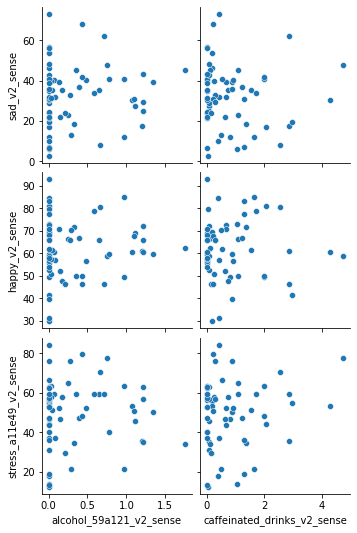

In [18]:
sns.pairplot(dfgr, vars=None, x_vars=['alcohol_59a121_v2_sense', 'caffeinated_drinks_v2_sense'], y_vars=moodVars, palette='Set1')                

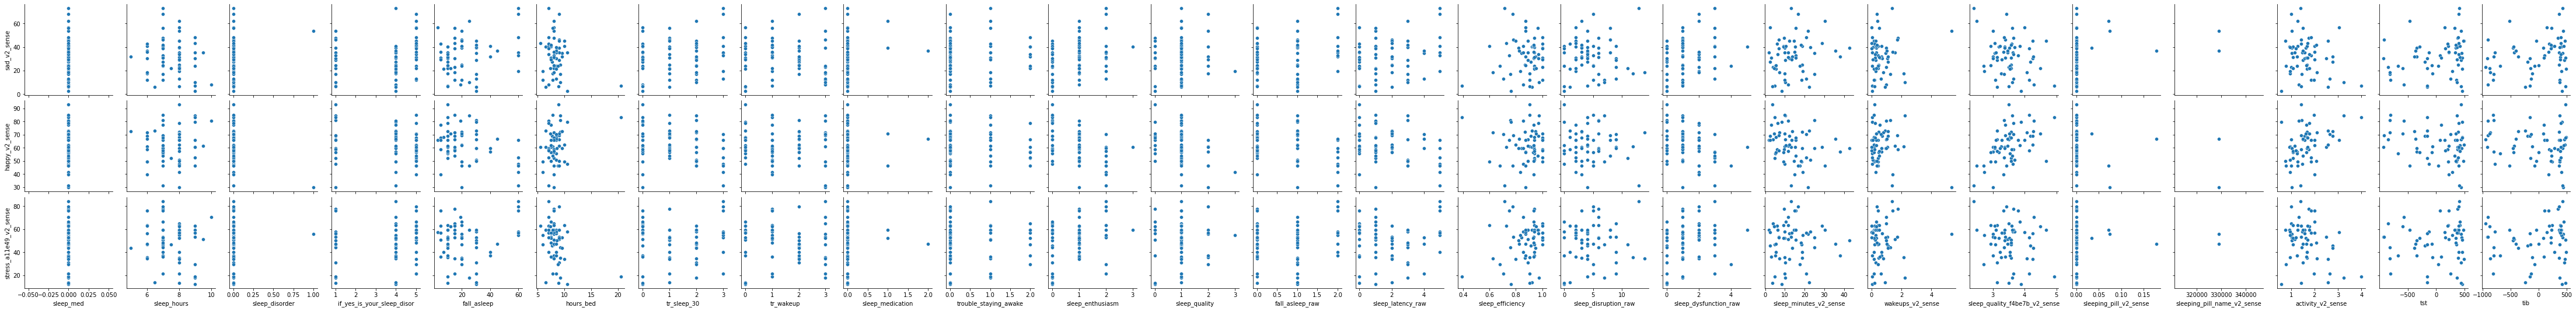

In [19]:
sns.pairplot(dfgr, vars=None, x_vars=sleepVars, y_vars=moodVars, palette='Set1')                

Text(0, 0.5, 'Subjective Happiness (1-100)')

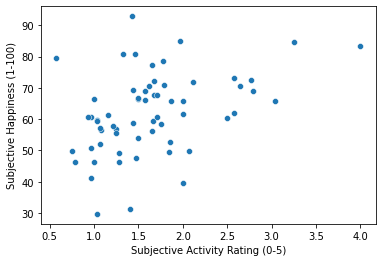

In [20]:
sns.scatterplot(data=dfgr, x='activity_v2_sense', y='happy_v2_sense')
plt.xlabel('Subjective Activity Rating (0-5)'); plt.ylabel('Subjective Happiness (1-100)')
# (0=Almost always sedentary, 5=Almost always active)

In [21]:
import statsmodels.api as sm

x = dfgr['activity_v2_sense'].tolist()
y = dfgr['happy_v2_sense'].tolist()

x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     11.88
Date:                Thu, 13 Jan 2022   Prob (F-statistic):            0.00104
Time:                        14:08:19   Log-Likelihood:                -240.04
No. Observations:                  62   AIC:                             484.1
Df Residuals:                      60   BIC:                             488.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.0163      4.084     12.003      0.0

Text(0, 0.5, 'Subjective Happiness (1-100)')

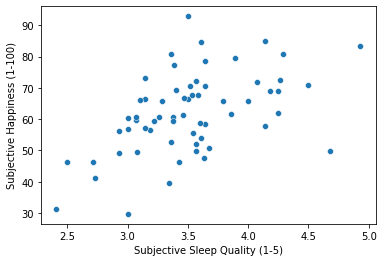

In [22]:
sns.scatterplot(data=dfgr, x='sleep_quality_f4be7b_v2_sense', y='happy_v2_sense')
plt.xlabel('Subjective Sleep Quality (1-5)'); plt.ylabel('Subjective Happiness (1-100)')

In [23]:
x = dfgr['sleep_quality_f4be7b_v2_sense'].tolist()
y = dfgr['happy_v2_sense'].tolist()

x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     20.13
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           3.33e-05
Time:                        14:08:19   Log-Likelihood:                -236.67
No. Observations:                  62   AIC:                             477.3
Df Residuals:                      60   BIC:                             481.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1918     10.111      1.700      0.0

Text(0, 0.5, 'Subjective Stress (1-100)')

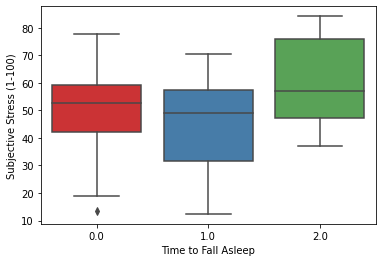

In [24]:
sns.boxplot(data=dfgr, x='fall_asleep_raw', y='stress_a11e49_v2_sense', palette='Set1')
plt.xlabel('Time to Fall Asleep'); plt.ylabel('Subjective Stress (1-100)')

In [25]:
from statsmodels.formula.api import ols

linmod = ols('stress_a11e49_v2_sense ~ C(fall_asleep_raw)', data=dfgr).fit()

table = sm.stats.anova_lm(linmod, typ=1)

print(table)

                      df        sum_sq     mean_sq         F    PR(>F)
C(fall_asleep_raw)   2.0   1467.098327  733.549164  2.767072  0.071014
Residual            59.0  15640.867586  265.099451       NaN       NaN


Text(0, 0.5, 'Subjective Stress (1-100)')

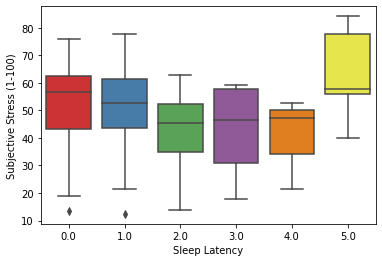

In [26]:
sns.boxplot(data=dfgr, x='sleep_latency_raw', y='stress_a11e49_v2_sense', palette='Set1')
plt.xlabel('Sleep Latency'); plt.ylabel('Subjective Stress (1-100)')

In [27]:
from statsmodels.formula.api import ols

linmod = ols('stress_a11e49_v2_sense ~ C(sleep_latency_raw)', data=dfgr).fit()

table = sm.stats.anova_lm(linmod, typ=1)

print(table)

                        df        sum_sq     mean_sq         F    PR(>F)
C(sleep_latency_raw)   5.0   2630.128208  526.025642  2.034657  0.087651
Residual              56.0  14477.837706  258.532816       NaN       NaN


Text(0, 0.5, 'Subjective Stress (1-100)')

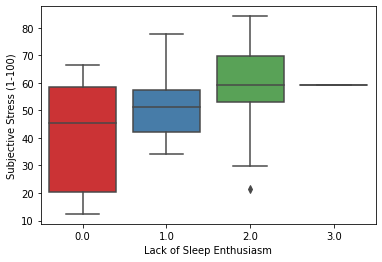

In [28]:
sns.boxplot(data=dfgr, x='sleep_enthusiasm', y='stress_a11e49_v2_sense', palette='Set1')
plt.xlabel('Lack of Sleep Enthusiasm'); plt.ylabel('Subjective Stress (1-100)')

In [29]:
from statsmodels.formula.api import ols

linmod = ols('stress_a11e49_v2_sense ~ C(sleep_enthusiasm)', data=dfgr).fit()

table = sm.stats.anova_lm(linmod, typ=1) 

print(table)

                       df        sum_sq     mean_sq         F    PR(>F)
C(sleep_enthusiasm)   3.0   2232.489961  744.163320  2.901519  0.042458
Residual             58.0  14875.475953  256.473723       NaN       NaN
